In [262]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

## Data Preprocessing
Reading, processing and summarizing data

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

In [264]:
# Reading file and displaying first rows to see the structure of data
cars = pd.read_excel('files/new_cars_reg.xlsx', sheet_name = 1)
cars.head()

,Kod,Nazwa,Okresy,Rodzaje pojazdów,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,1 kwartał,samochody osobowe,2011,67610,szt.,
1,0,POLSKA,1 kwartał,samochody osobowe,2012,77577,szt.,
2,0,POLSKA,1 kwartał,samochody osobowe,2013,75906,szt.,
3,0,POLSKA,1 kwartał,samochody osobowe,2014,52522,szt.,
4,0,POLSKA,1 kwartał,samochody osobowe,2015,92108,szt.,


In [265]:
quarter_to_month = {
    "1 kwartał": [1, 2, 3],
    "2 kwartał": [4, 5, 6],
    "3 kwartał": [7, 8, 9],
    "4 kwartał": [10, 11, 12]
}
cars = cars[cars['Atrybut'] != 'n']
cars.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut', 'Rodzaje pojazdów'], axis = 1, inplace = True)
cars.rename(columns={'Wartosc': 'Cars'}, inplace=True)
cars = cars.loc[cars.index.repeat(3)].reset_index(drop=True)
num_rows = len(cars)
cars['Numer'] = [i % 3 for i in range(num_rows)]
for index, row in cars.iterrows():
    cars.loc[index, "Month"] = int(quarter_to_month[row["Okresy"]][row["Numer"]])
cars["Month"] = cars["Month"].astype(int)
cars.rename(columns = {'Rok' : 'Year'}, inplace = True)
cars['Data'] = pd.to_datetime(cars[['Year', 'Month']].assign(DAY=1))

cars.head()

,Okresy,Year,Cars,Numer,Month,Data
0,1 kwartał,2011,67610,0,1,2011-01-01
1,1 kwartał,2011,67610,1,2,2011-02-01
2,1 kwartał,2011,67610,2,3,2011-03-01
3,1 kwartał,2012,77577,0,1,2012-01-01
4,1 kwartał,2012,77577,1,2,2012-02-01


In [266]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [267]:
# Reading file and displaying first rows to see the structure of data - unemployment
unemployment = pd.read_excel('files/general_unemployment.xlsx', sheet_name = 1)
unemployment.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [268]:
# Viewing columns and their datatypes
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [269]:
# Cleaning up data - drop null data and irrelevant columns
unemployment = unemployment[unemployment['Atrybut'] != 'n']
unemployment.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
unemployment.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
unemployment.head()

,Miesiące,Płeć,Rok,Osoby
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [270]:
# Applying month map and creating date column
unemployment['Month'] = unemployment['Miesiące'].map(month_mapping)
unemployment.rename(columns = {'Rok' : 'Year'}, inplace = True)
unemployment['Data'] = pd.to_datetime(unemployment[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
unemployment['Osoby'] = unemployment['Osoby'].astype(int)
unemployment.head()

,Miesiące,Płeć,Year,Osoby,Month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


## Exploratory Data Analysis (EDA)

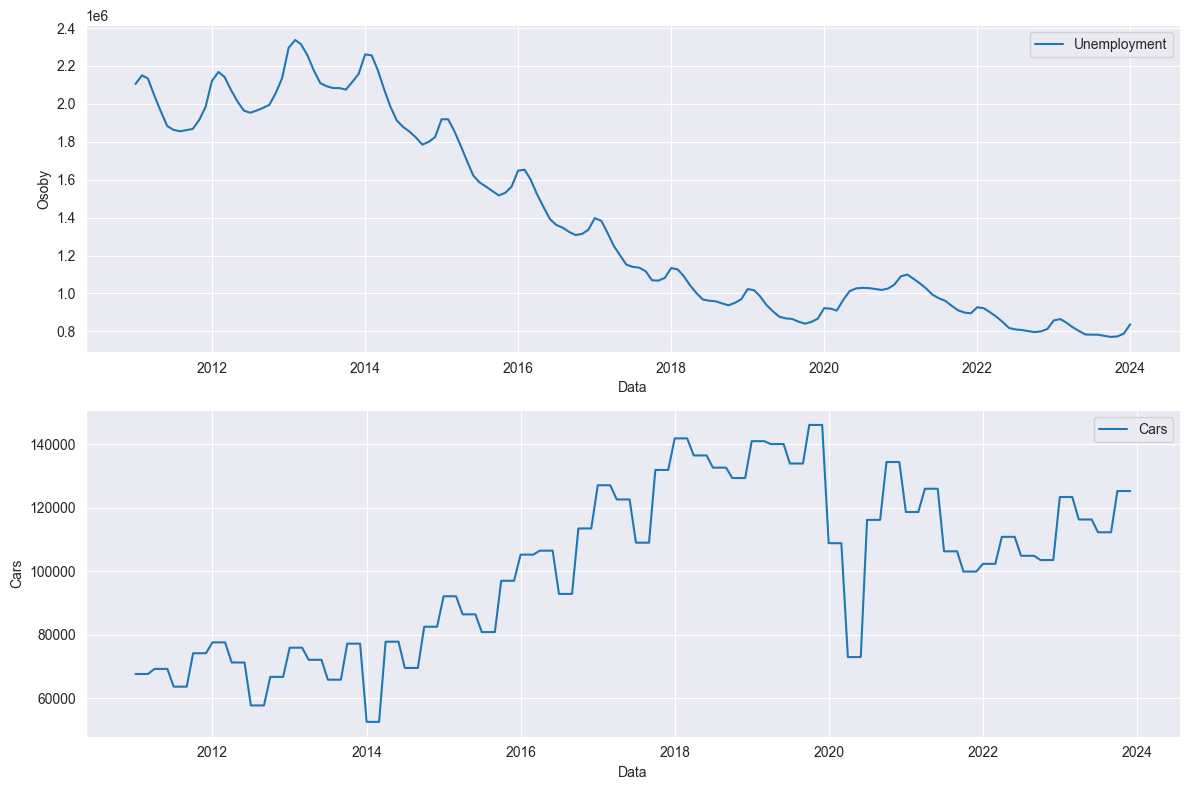

In [271]:
fig = plt.figure(figsize = [12,8])

plt.subplot(2, 1, 1)
sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)

plt.subplot(2, 1, 2)
sns.lineplot(
    x="Data",
    y="Cars",
    data=cars,
    label="Cars"
)
plt.xlabel("Data")
plt.tight_layout()

plt.legend()

plt.show()

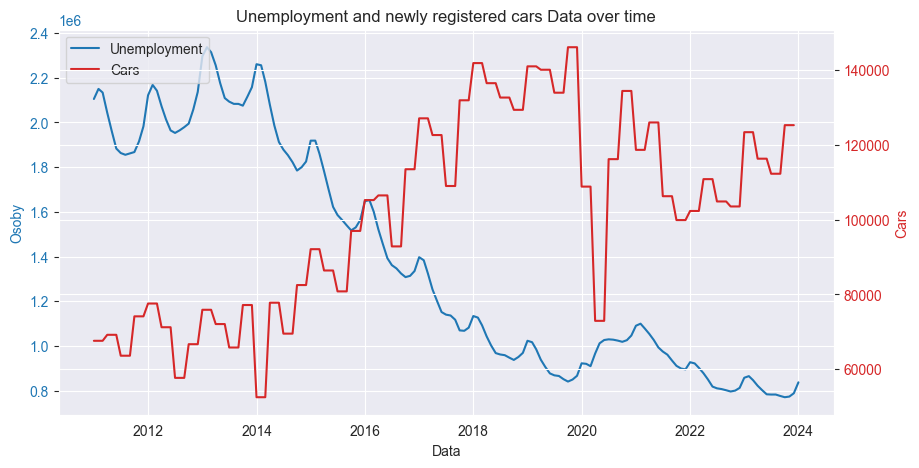

In [272]:
plt.figure(figsize=(10, 5))

# Unemployment data
ax1 = sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)
ax1.set_xlabel("Data")
ax1.set_ylabel("Osoby", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Currency data
ax2 = ax1.twinx()
sns.lineplot(
    x="Data",
    y="Cars",
    data=cars,
    ax=ax2,
    color='tab:red',
    label="Cars"
)
ax2.set_ylabel("Cars", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Removing duplicate legend
ax2.get_legend().remove()

plt.title("Unemployment and newly registered cars Data over time")
plt.show()

In [273]:
cars.set_index('Data', inplace=True)
cars['Cars'].to_csv('files/cars_mod.csv')